Entry: /usr/lib/python3/dist-packages/ipykernel_launcher.py
System argument(s): 3
Start of "/usr/lib/python3/dist-packages/ipykernel_launcher.py"
IP    Arctangent of 1.000000 / 1.000000: 20741.072184

Numpy Arctagent of 1.000000 / 1.000000: 45.000000

IP    Arctangent of 1.000000 / 2.000000: 32773.185881

Numpy Arctagent of 1.000000 / 2.000000: 26.565051

IP    Arctangent of 1.000000 / 3.000000: 46352.285626

Numpy Arctagent of 1.000000 / 3.000000: 18.434949

IP    Arctangent of 1.000000 / 4.000000: 60447.047386

Numpy Arctagent of 1.000000 / 4.000000: 14.036243

IP    Arctangent of 1.000000 / 5.000000: 74770.992265

Numpy Arctagent of 1.000000 / 5.000000: 11.309932

IP    Arctangent of 1.000000 / 6.000000: 89209.528702

Numpy Arctagent of 1.000000 / 6.000000: 9.462322

IP    Arctangent of 1.000000 / 7.000000: 103705.360919

Numpy Arctagent of 1.000000 / 7.000000: 8.130102

IP    Arctangent of 1.000000 / 8.000000: 118201.193135

Numpy Arctagent of 1.000000 / 8.000000: 7.125016

IP    A

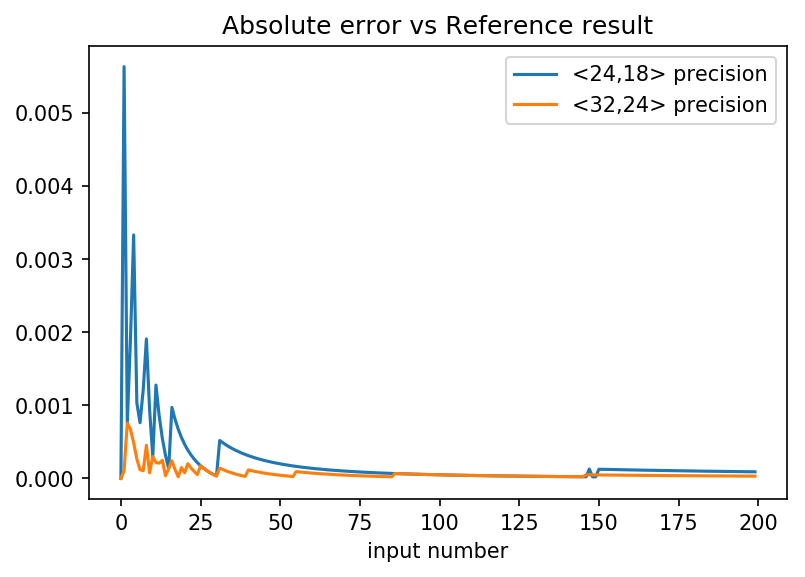

Exit process


In [9]:
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append('/home/xilinx')
from pynq import Overlay
import numpy as np
scale_factor=2**6
def compute_arc():
    for i in range(1,9):
        print("============================")
        for j in range(1,9):
            regIP.write(0x400, i*scale_factor )
            regIP.write(0x800, j*scale_factor )
            theta = regIP.read(0xc00)
            print("IP    Arctangent of %f / %f: %f\n"%(i, j, 180*theta/np.pi))
            print("Numpy Arctagent of %f / %f: %f\n"%(i, j,  180*np.arctan(i/j)/np.pi ))
            print("============================")


if __name__ == "__main__":
    print("Entry:", sys.argv[0])
    print("System argument(s):", len(sys.argv))

    print("Start of \"" + sys.argv[0] + "\"")

    ol = Overlay("/home/xilinx/bitstream/Cordic.bit")
    regIP = ol.top_process_magnitude_0

    compute_arc()
    plt.figure(dpi=150)
    plt.title('Absolute error vs Reference result')
    plt.xlabel('input number')
    plt.plot(error_24_18, label='relative error')
    plt.plot(error_32_24, label='relative error')
    plt.legend( ['<24,18> precision', '<32,24> precision']);
    plt.show()
    #plt.savefig('filename.png', dpi=300)
    print("Exit process")